In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as ln
import random
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn.feature_selection import mutual_info_classif

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("diabetes_data_upload.csv")
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


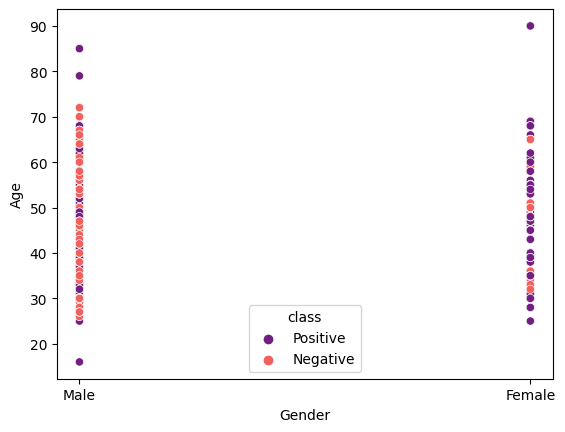

In [3]:
ax = sns.scatterplot(x='Gender',y='Age',data=data,palette='magma',hue='class')


In [4]:
data["Age"]=pd.to_numeric(pd.cut(data['Age'], bins=[0,30,40,50,60,100], labels=[1,2,3,4,5]))

In [5]:
data.isnull().values.any()

False

In [6]:
data=data.replace({'Yes':1,'No':0,'Male':1,'Female':0,'Positive':1,'Negative':0})


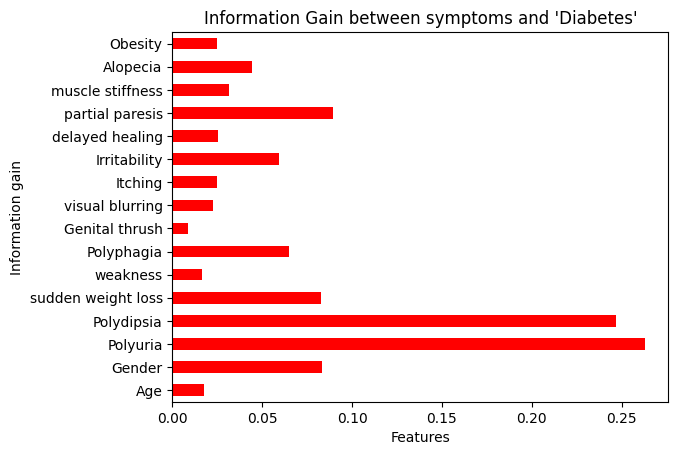

In [7]:
test_data=data['class'].values
train_data=data.drop('class',axis=1)

importances=mutual_info_classif(train_data,test_data)
imp_features=pd.Series(importances, train_data.columns)
plt2=imp_features.plot(kind='barh',ylabel='Information gain',
                  xlabel='Features',
                  title="Information Gain between symptoms and 'Diabetes'",color='red')
fig=plt2.get_figure()
fig.savefig('inf_gain.jpg')

In [8]:
train_data=train_data.values
x_train,x_test,y_train,y_test=train_test_split(train_data,test_data,test_size=0.25,random_state=0)

In [9]:
sgd=SGDClassifier(tol=1e-5,max_iter=10000)
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
acc1=round(accuracy_score(y_pred,y_test)*100,3)
acc1

87.692

In [10]:
def costValue(A,b, x):

    val = 0.0
    
    for i in range(A.shape[0]):
        val += (b[i] - np.dot(x,A[i,:]))**2
        
    return val / 2

In [11]:
def gradient(A,b, x):

    grad = np.zeros(x.shape)
    
    for j in range(len(grad)):
        for i in range(A.shape[0]):
            grad[j] += (b[i] - np.dot(x,A[i,:]))*A[i,j]
        
    return - grad
def batch_gradient(A,b, epsilon,lr):
    x = np.zeros(A.shape[1])
    
    diff = 1

    iter=0
    val_=costValue(A,b,x)
    _each_val = val_
    
    grad=gradient(A,b,x)
    while (ln.norm(diff)>epsilon):
        iter=iter+1

        if ln.norm(diff)>1e6:
            break

        x_new=x-lr*grad
        diff = x_new - x
        x = x_new

        val_= costValue(A,b,x)
        _each_val = np.vstack((_each_val,val_))
        grad = gradient(A,b,x)
    
    return x, _each_val

In [12]:
def SGD(X, y, lr,epochs):
    
    w = np.zeros(X.shape[1])
    loss = []
    for t in range(epochs):
        idx = random.randrange(X.shape[0])
        y1=y[idx]
        X1=X[idx]


        grad = -(y1 - np.dot(w, X1)) * X1

        w -= lr * grad
        l2 = 0
        for i in range(len(y)):
            l2 += (y[i] - np.dot(w, X[i]))**2
        l2 /=2
        loss.append(l2)


        if ln.norm(lr * grad) < 1e-6:
            break

    return w, loss

--------------SGD----------------
Cost value value after applying the weighted vector is  123.0


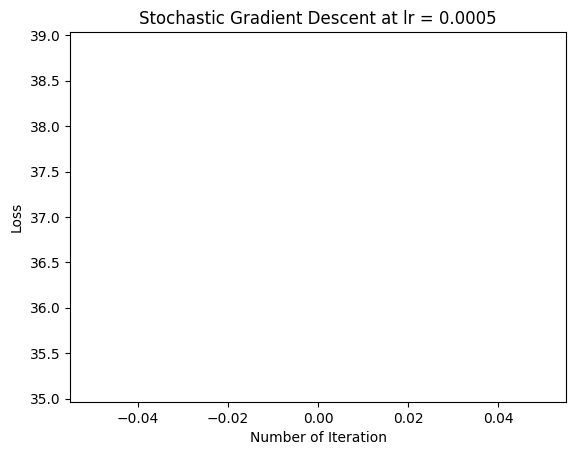

CPU times: user 296 ms, sys: 52.1 ms, total: 348 ms
Wall time: 239 ms


In [13]:
%%time
[wt, lt]=SGD(x_train, y_train,lr=0.0005,epochs=10000)
print('--------------SGD----------------')
[wt2,Loss2]=SGD(x_test, y_test,lr=0.0005,epochs=10000)
print('Cost value value after applying the weighted vector is ',costValue(x_train,y_train,wt))
# print(Loss2[10])
plt.figure()
plt.plot(Loss2, 'r') 
plt.title('Stochastic Gradient Descent at lr = 0.0005')
plt.xlabel('Number of Iteration')
plt.ylabel('Loss')
plt.show()


-------------BGD----------------


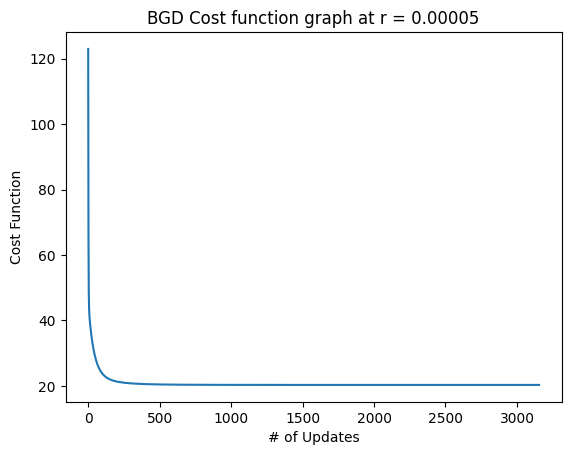

CPU times: user 53.4 s, sys: 114 ms, total: 53.5 s
Wall time: 53.7 s


In [14]:
%%time
epsilon = 1e-6
w, fh = batch_gradient(x_train,y_train, epsilon,0.00005)
print('-------------BGD----------------')

plt.figure()
plt.plot(range(len(fh)),fh)
plt.title('BGD Cost function graph at r = 0.00005')
plt.xlabel('# of Updates')
plt.ylabel('Cost Function')
plt.show()


In [15]:
##TO DO 
# Conjugate Gradient Descent
# Logistic Regression
# Compare performances

In [16]:
def initialize(dimension):
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias
def sigmoid(z):  
    y_head = 1/(1+ np.exp(-z))
    return y_head

def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss)
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 78.46708739986252


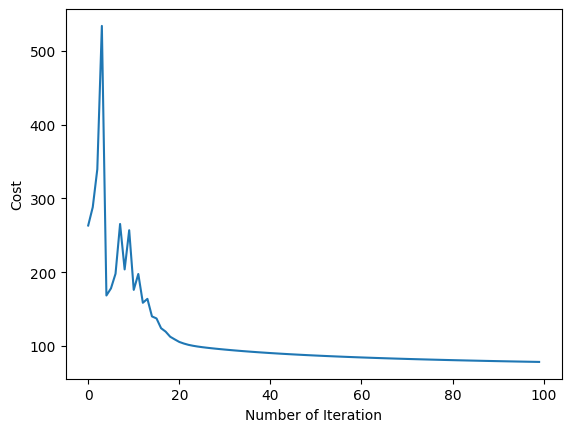

Test Accuracy: 91.54%
CPU times: user 245 ms, sys: 105 ms, total: 350 ms
Wall time: 169 ms


In [17]:
%%time
logistic_regression(x_train.T,y_train,x_test.T,y_test,1,100)


MSE using CGD: 0.10401648737650131


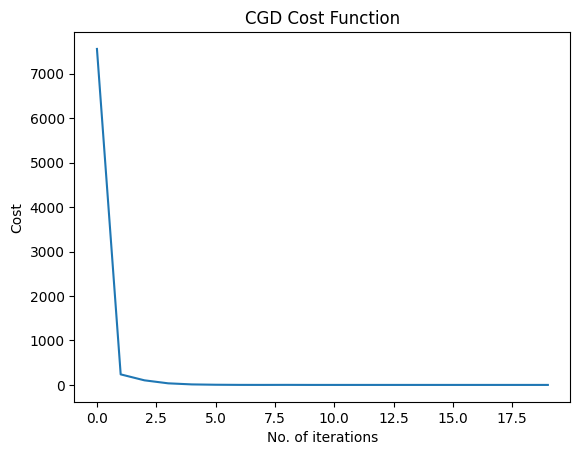

CPU times: user 288 ms, sys: 92.7 ms, total: 381 ms
Wall time: 202 ms


<Figure size 640x480 with 0 Axes>

In [18]:
%%time
def conjugate_gradient_descent(x, y, N, theta, alpha):
    thetas = []
    costs= []
    pred=[]
    
    k = 0
    A = np.dot(x.T, x)
    b = np.dot(x.T, y)
    r = b - np.dot(A, theta)
    p = r
    thetas.append(theta)
    costs.append(r)
    pred.append(np.dot(x, theta))

    while True:
        alpha_ = ln.norm(costs[-1])**2 / np.dot(np.dot(p.T, A), p)
        thetas.append(thetas[-1] + alpha_ * p)
        pred.append(np.dot(x, thetas[-1]))
        if ln.norm(alpha_ * p) < 1e-9:
            break
        r_new = costs[-1] - alpha_ * np.dot(A, p)
        beta_ = ln.norm(r_new)**2 / ln.norm(costs[-1])**2
        p = r_new + beta_ * p
        costs.append(r_new)
        if r_new.any() == False or p.any() == False or k == N - 2:
            break
        else:
            k += 1
            continue
    alpha_ = ln.norm(costs[-1])**2 / np.dot(np.dot(p.T, A), p)
    thetas.append(thetas[-1] + alpha_ * p)
    pred.append(np.dot(x, thetas[-1]))

    return   costs,pred, thetas
        

alpha = 0.00005  
N = x_train.shape[0]  
np.random.seed(0)
theta = np.random.rand(16)  

    
costs,pred, theta_list= conjugate_gradient_descent(x_train, y_train, N, theta, alpha)
mse = ((pred[-1]-y_train)**2).mean()

print(f'MSE using CGD: {mse}')
plt.title("CGD Cost Function")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.plot([ln.norm(i) for i in costs])
plt.show()
plt.savefig("CGD.png")
